In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 1. return

In [49]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
#----------------------------------------------------

import glob
interval = ["point125","point25","point5","point75"]
itv = interval[3]
algorithm = "td3" # "ppo"
txt_dir = "../SHARCNET/Results/debug/"+algorithm+"/"+itv+"/"
modes = ["SARA","PLA"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(txt_dir+ mode + "/**/" +"*.txt", recursive=True)
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 2 files found
../SHARCNET/Results/debug/td3/point75/SARA\2019-09-18-003622-0-0\td3\td3_s0\progress.txt
../SHARCNET/Results/debug/td3/point75/SARA\2019-09-18-003625-1-0\td3\td3_s0\progress.txt
PLA: 2 files found
../SHARCNET/Results/debug/td3/point75/PLA\2019-09-18-133007-0-0\td3\td3_s0\progress.txt
../SHARCNET/Results/debug/td3/point75/PLA\2019-09-18-134207-1-0\td3\td3_s0\progress.txt


In [50]:
all_combined_data = dict()
if algorithm == "ppo":
    metrics = ["AverageEpRet", "AverageVVals"]
    col_names = ["return", "V_means"]
else:
    metrics = ["AverageEpRet", "AverageQ1Vals", "AverageQ2Vals"]
    col_names = ["return","Q1_means","Q2_means"]
for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file, sep="\t"))
    
    mode_combined_data = pd.DataFrame()
    for metric, col_name in zip(metrics, col_names):
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[col_name+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[col_name+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[col_name+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

In [51]:
all_combined_data['SARA']

,return_run0,return_run1,return_avg,return_std,Q1_means_run0,Q1_means_run1,Q1_means_avg,Q1_means_std,Q2_means_run0,Q2_means_run1,Q2_means_avg,Q2_means_std
0,13.732923,11.716308,12.724616,1.008308,0.494428,0.438219,0.466324,0.028105,0.489101,0.427882,0.458492,0.030609
1,14.771011,14.955256,14.863133,0.092123,0.542204,0.524946,0.533575,0.008629,0.531222,0.522417,0.526820,0.004403
2,16.289505,14.148163,15.218834,1.070671,0.561740,0.559435,0.560588,0.001152,0.565196,0.560652,0.562924,0.002272
3,13.923856,14.412063,14.167959,0.244104,0.581093,0.594870,0.587981,0.006889,0.577422,0.592860,0.585141,0.007719
4,13.210290,14.823851,14.017070,0.806781,0.603381,0.615112,0.609247,0.005865,0.602415,0.616477,0.609446,0.007031
5,13.405515,17.981594,15.693555,2.288040,0.604239,0.660464,0.632352,0.028113,0.607388,0.657213,0.632301,0.024913
6,15.943448,15.373388,15.658418,0.285030,0.652192,0.736664,0.694428,0.042236,0.648413,0.739578,0.693996,0.045582
7,14.572324,16.659098,15.615711,1.043387,0.687953,0.825207,0.756580,0.068627,0.689675,0.822653,0.756164,0.066489
8,13.697165,15.578665,14.637915,0.940750,0.750387,0.931062,0.840724,0.090337,0.749502,0.932115,0.840808,0.091307
9,14.804558,17.002398,15.903478,1.098920,0.812664,1.064614,0.938639,0.125975,0.812443,1.065524,0.938983,0.126540


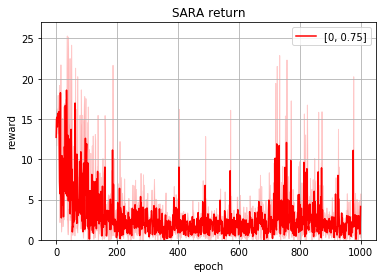

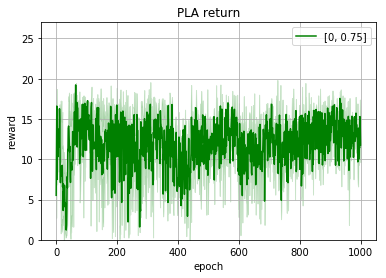

In [52]:
# Plot return
colors = ['r','g','b']
metric = "return"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(data.index, data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(data.index, data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,27])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig("./plots_for_thesis/debug/"+algorithm+"/"+"{}_{}_{}.png".format(itv,mode,metric), bbox_inches='tight')


### 2. V_mean

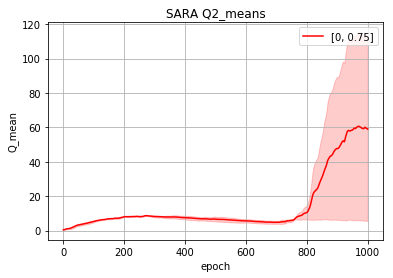

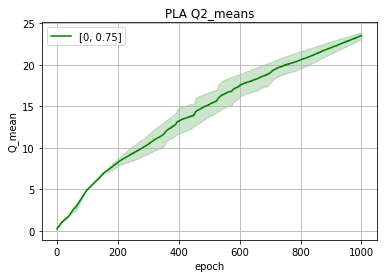

In [59]:
colors = ['r','g','b']
metric = "Q2_means"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("Q_mean")
    plt.savefig('./plots_for_thesis/debug/'+algorithm+'/{}_{}_{}.png'.format(itv,mode,metric), bbox_inches='tight')
    